# NLP Pipeline
We will learn some basic operations of the NLP pipelines with the help of two libraries, NLTK and spaCy. These will prove useful in your project for tasks such as preprocessing.

In [7]:
%pip install -q nltk matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## NLTK
We will use [Chapter 3 of the introductory manual of NLTK](https://www.nltk.org/book/ch03.html) to solve the following exercises.

First, use the interactive downloader to get the *gutenberg* book corpus (in the *Corpora* tab). Take a moment to admire the amazing user interface.

In [8]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

NLTK automatically saves its files in the `nltk_data` folder in your home directory. (Windows users: Maybe it's in your `Documents`?)

We load the raw text of the first book in the corpus.

In [9]:
from nltk.corpus import gutenberg
raw_text = gutenberg.raw('austen-emma.txt')
print(len(raw_text))

887071


To use nltk's tokenization, we need to download the `punkt_tab` resource.

In [10]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Nevin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

Count the number of words and sentences in the book.

In [11]:
#count number of words
words = nltk.word_tokenize(raw_text)
print(len(words))

#count number of sentences
sentences = nltk.sent_tokenize(raw_text)
print(len(sentences))

191855
7493


- Lowercase all words. 
- Count the number of unique lower-cased words in the book.

In [12]:
#lowercase all words
words = [word.lower() for word in words]

#count number of unique lowercase words
unique_words = set(words)
print(len(unique_words))

#print type token ratio
ttr = len(unique_words) / len(words)
print(ttr * 100, '%')

7914
4.124990226994345 %


The total number of words is also called *tokens*, and the unique words are the *types*. (This is the same distinction as instance vs. class in software engineering.)

We now perform *stemming* on the first 50 words of the text. We use the PorterStemmer (example usage [here](https://www.nltk.org/howto/stem.html)). Plot only the pairs of words that have changed after stemming.

In [13]:
#stemming on first 50 words
stemmer = nltk.PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in words[:50]]

#print words changed by stemming
for i in range(50):
    if words[i] != stemmed_words[i]:
        print(words[i], '->', stemmed_words[i])


volume -> volum
woodhouse -> woodhous
handsome -> handsom
comfortable -> comfort
happy -> happi
disposition -> disposit
seemed -> seem
unite -> unit
blessings -> bless
existence -> exist
lived -> live
nearly -> nearli
twenty-one -> twenty-on
years -> year


Find the 10 most frequent words, together with their counts, using the `FreqDist` object from NLTK. Save it to a variable named `fdist`.

In [14]:
fdist = nltk.FreqDist(words)
print(fdist.most_common(10))

[(',', 12016), ('.', 6355), ('the', 5201), ('to', 5181), ('and', 4877), ('of', 4284), ('i', 3177), ('a', 3124), ('--', 3100), ('it', 2503)]


Run the below command to see the word counts vs. the words in the frequency distribution.

<Axes: xlabel='Samples', ylabel='Counts'>

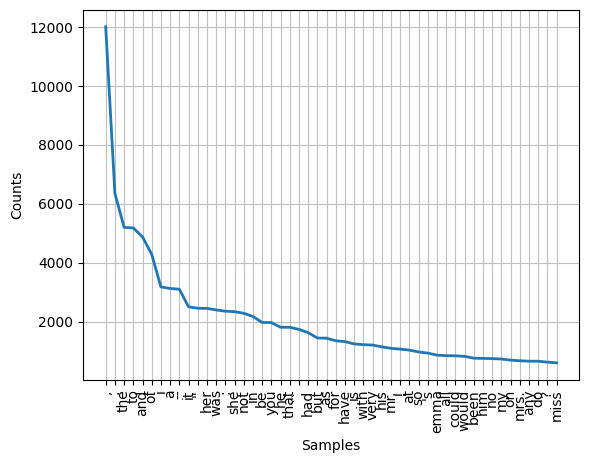

In [15]:
fdist.plot(50)

This curve is characteristic of any natural (= human) language, and is known as [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law). It states that the frequency of a word is inversely proportional to its rank, i.e.:
$$\text{frequency}(x) \propto \frac{1}{\text{rank}(x)}$$

## Hugging Face

With Transformers (we will get to know them in more detail later in the course), tokenization has become part of the model itself. As opposed to `word_tokenize` in NLTK, Transformers use BPE tokenization.

We first install Hugging Face's `transformers` library.

In [16]:
%pip install -q transformers ipywidgets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Use the [model page of the base-uncased version of BERT](https://huggingface.co/google-bert/bert-base-uncased) to initialize a `BertTokenizer`.

In [17]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

c:\Users\Nevin\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Nevin\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

We look at the first sentence of Jane Austen's Emma.

In [18]:
sentence = nltk.sent_tokenize(raw_text)[0].split('\n\n\n')[-1].replace('\n', ' ')
print(sentence)

Emma Woodhouse, handsome, clever, and rich, with a comfortable home and happy disposition, seemed to unite some of the best blessings of existence; and had lived nearly twenty-one years in the world with very little to distress or vex her.


Encode the sentence. Look at the outputs of the following functions:
- `tokenizer(sentence)`
- `tokenizer.encode(sentence)`
- `tokenizer.tokenize(sentence)`
- `tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentence))`

In [19]:
tokenizer(sentence)

{'input_ids': [101, 5616, 3536, 4580, 1010, 8502, 1010, 12266, 1010, 1998, 4138, 1010, 2007, 1037, 6625, 2188, 1998, 3407, 22137, 1010, 2790, 2000, 15908, 2070, 1997, 1996, 2190, 24618, 1997, 4598, 1025, 1998, 2018, 2973, 3053, 3174, 1011, 2028, 2086, 1999, 1996, 2088, 2007, 2200, 2210, 2000, 12893, 2030, 2310, 2595, 2014, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [20]:
tokenizer.encode(sentence)

[101,
 5616,
 3536,
 4580,
 1010,
 8502,
 1010,
 12266,
 1010,
 1998,
 4138,
 1010,
 2007,
 1037,
 6625,
 2188,
 1998,
 3407,
 22137,
 1010,
 2790,
 2000,
 15908,
 2070,
 1997,
 1996,
 2190,
 24618,
 1997,
 4598,
 1025,
 1998,
 2018,
 2973,
 3053,
 3174,
 1011,
 2028,
 2086,
 1999,
 1996,
 2088,
 2007,
 2200,
 2210,
 2000,
 12893,
 2030,
 2310,
 2595,
 2014,
 1012,
 102]

In [21]:
tokenizer.tokenize(sentence)

['emma',
 'wood',
 '##house',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 ';',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty',
 '-',
 'one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 've',
 '##x',
 'her',
 '.']

In [22]:
tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentence))

[5616,
 3536,
 4580,
 1010,
 8502,
 1010,
 12266,
 1010,
 1998,
 4138,
 1010,
 2007,
 1037,
 6625,
 2188,
 1998,
 3407,
 22137,
 1010,
 2790,
 2000,
 15908,
 2070,
 1997,
 1996,
 2190,
 24618,
 1997,
 4598,
 1025,
 1998,
 2018,
 2973,
 3053,
 3174,
 1011,
 2028,
 2086,
 1999,
 1996,
 2088,
 2007,
 2200,
 2210,
 2000,
 12893,
 2030,
 2310,
 2595,
 2014,
 1012]

**Decoding.** Check out the various ways of decoding: `.decode`, `.convert_ids_to_tokens`, `.convert_tokens_to_string`.

In [23]:
input_ids = tokenizer.encode(sentence)
print(tokenizer.decode(input_ids, skip_special_tokens=True))
print(tokenizer.convert_ids_to_tokens(input_ids))

emma woodhouse, handsome, clever, and rich, with a comfortable home and happy disposition, seemed to unite some of the best blessings of existence ; and had lived nearly twenty - one years in the world with very little to distress or vex her.
['[CLS]', 'emma', 'wood', '##house', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty', '-', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 've', '##x', 'her', '.', '[SEP]']


**Tokenization differences.** Compare the tokenization of NLTK, bert-base-uncased and [t5-small](https://huggingface.co/google-t5/t5-small).

In [24]:
#compare tokenization from NLTK, bert-base-uncased and t5-small
print(nltk.word_tokenize(sentence))
print(tokenizer.tokenize(sentence))

from transformers import AutoTokenizer
#use t5-small tokenizer
t5_tokenzizer = AutoTokenizer.from_pretrained('google-t5/t5-small')
print(t5_tokenzizer.tokenize(sentence))



['Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.']
['emma', 'wood', '##house', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty', '-', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 've', '##x', 'her', '.']


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

c:\Users\Nevin\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Nevin\.cache\huggingface\hub\models--google-t5--t5-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

['▁Emma', '▁Wood', 'house', ',', '▁handsome', ',', '▁clever', ',', '▁and', '▁rich', ',', '▁with', '▁', 'a', '▁comfortable', '▁home', '▁and', '▁happy', '▁disposition', ',', '▁seemed', '▁to', '▁unit', 'e', '▁some', '▁of', '▁the', '▁best', '▁blessing', 's', '▁of', '▁existence', ';', '▁and', '▁had', '▁lived', '▁nearly', '▁twenty', '-', 'one', '▁years', '▁in', '▁the', '▁world', '▁with', '▁very', '▁little', '▁to', '▁distress', '▁or', '▁', 've', 'x', '▁her', '.']


Now `encode` and `decode` the sentence with all 3 tokenizers. Is the encoding/decoding lossless, i.e. do we recover the original sentence?

In [25]:
#encode and decode with all three tokenizers
print(tokenizer.encode(sentence))
print(t5_tokenzizer.encode(sentence))

print(tokenizer.decode(tokenizer.encode(sentence), skip_special_tokens=True))
print(t5_tokenzizer.decode(t5_tokenzizer.encode(sentence), skip_special_tokens=True))


[101, 5616, 3536, 4580, 1010, 8502, 1010, 12266, 1010, 1998, 4138, 1010, 2007, 1037, 6625, 2188, 1998, 3407, 22137, 1010, 2790, 2000, 15908, 2070, 1997, 1996, 2190, 24618, 1997, 4598, 1025, 1998, 2018, 2973, 3053, 3174, 1011, 2028, 2086, 1999, 1996, 2088, 2007, 2200, 2210, 2000, 12893, 2030, 2310, 2595, 2014, 1012, 102]
[15325, 2985, 1840, 6, 22989, 6, 13183, 6, 11, 2354, 6, 28, 3, 9, 1965, 234, 11, 1095, 8295, 6, 3776, 12, 1745, 15, 128, 13, 8, 200, 10463, 7, 13, 6831, 117, 11, 141, 4114, 2111, 6786, 18, 782, 203, 16, 8, 296, 28, 182, 385, 12, 19285, 42, 3, 162, 226, 160, 5, 1]
emma woodhouse, handsome, clever, and rich, with a comfortable home and happy disposition, seemed to unite some of the best blessings of existence ; and had lived nearly twenty - one years in the world with very little to distress or vex her.
Emma Woodhouse, handsome, clever, and rich, with a comfortable home and happy disposition, seemed to unite some of the best blessings of existence; and had lived nearly tw

## spaCy
We will use the [spaCy 101 guide](https://spacy.io/usage/spacy-101) to familiarize ourselves with its capabilities. First we install and download the small core model for English.

In [26]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

%pip install setuptools wheel
%pip install spacy
!python -m spacy download en_core_web_sm

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: setuptools in c:\users\nevin\appdata\local\programs\python\python312\lib\site-packages (75.5.0)




[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/11.8 MB ? eta -:--:--
   ------------- -------------------------- 3.9/11.8 MB 21.3 MB/s eta 0:00:01
   -------------------------------- ------- 9.7/11.8 MB 25.2 MB/s eta 0:00:01
   ---------------------------------------- 11.8/11.8 MB 24.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/632.6 kB ? eta -:--:--
   --------------------------------------- 632.6/632.6 kB 24.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 25.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ------------------------------------ --- 5.8/6.3 MB 27.0 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 25.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/5.4 MB ? eta -:--:--
   ---------------------------------------- 5.4/5.4 MB 25.2 MB/s eta 0:00:00
Note: you may need to restart


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ----------- ---------------------------- 3.7/12.8 MB 19.8 MB/s eta 0:00:01
     ---------------------------- ----------- 9.2/12.8 MB 23.8 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 24.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


*(You may have to restart your kernel after installing spacy.)*

We can now load the NLP pipeline from the small model.

In [27]:
import spacy
pipeline = spacy.load('en_core_web_sm')
doc = pipeline('Apple is looking at buying U.K. startup for $1 billion.')

The `doc` object has now tokenized our sentence and ran the NLP pipeline on it, as shown in this image:
![spacy pipeline](https://spacy.io/images/pipeline.svg)

Use the 101 guide to display the following information about each token.
- Text: The original word text.
- Lemma: The base form of the word.
- POS: The simple [UPOS](https://universaldependencies.org/u/pos/) part-of-speech tag.
- Tag: The detailed part-of-speech tag.
- Dep: Syntactic dependency, i.e. the relation between tokens.
- Shape: The word shape – capitalization, punctuation, digits.
- is stopword: Is the token part of a stop list, i.e. the most common words of the language?

In [28]:
#show the original text using spacy
for token in doc:
    print(token.text, token.pos_, token.dep_)

Apple PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.K. PROPN nsubj
startup VERB ccomp
for ADP prep
$ SYM quantmod
1 NUM compound
billion NUM pobj
. PUNCT punct


Looking at the named entities in `doc`, print the following information:
- The token's text
- The start index of the named entity
- Its end index
- The NER label

In [30]:
#printe the tokens text
print([token.text for token in doc])

#print the start index of the named entity
print([(ent.text, ent.start_char) for ent in doc.ents])

#print its end index
print([(ent.text, ent.end_char) for ent in doc.ents])

#print the NER label
print([(ent.text, ent.label_) for ent in doc.ents])

['Apple', 'is', 'looking', 'at', 'buying', 'U.K.', 'startup', 'for', '$', '1', 'billion', '.']
[('Apple', 0), ('U.K.', 27), ('$1 billion', 44)]
[('Apple', 5), ('U.K.', 31), ('$1 billion', 54)]
[('Apple', 'ORG'), ('U.K.', 'GPE'), ('$1 billion', 'MONEY')]


**Question:** Search the internet for a description of the entity labels `FAC`, `ORG`, `GPE` and `LOC`.

**Answer:**